In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

#### Load Data

In [9]:
data = sio.loadmat('ex7data2.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [10]:
X = data['X']
X.shape

(300, 2)

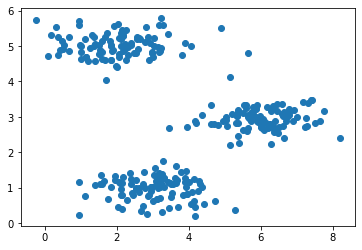

In [11]:
plt.scatter(X[:,0],X[:,1])
plt.show()

#### Kmeans

In [20]:
# find the centroid of each point
def find_centroid(X, centroid):
    idx = []
    for i in range(len(X)):
        dis = np.linalg.norm((X[i]-centroid), axis=1) # calculate distance of point i to each centroid
        id_i = np.argmin(dis) # get the index of the minimum distance
        idx.append(id_i)
    return np.array(idx)   

In [15]:
# calculate centroid
def compute_centroid(X, idx, k):
    centroid = []
    for i in range(k):
        centroid_i = np.mean(X[idx==i], axis=0)
        centroid.append(centroid_i)
    return np.array(centroid)

In [16]:
def run_kmeans(X, centroid, iters):
    
    k = len(centroid)
    centroid_all = []
    centroid_all.append(centroid) #initial centroid
    
    for i in range(iters):
        idx = find_centroid(X, centroid)
        centroid = compute_centroid(X, idx, k)
        centroid_all.append(centroid)
        
    return idx, np.array(centroid_all)

#### Plot Points and Centroids

In [26]:
def plot_data(X, centroid_all, idx):
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=idx, cmap='rainbow')
    plt.plot(centroid_all[:,:,0], centroid_all[:,:,1],'kx--')       

In [22]:
centroid = np.array([[3, 3], [6, 2], [8, 5]])
iters = 10

In [24]:
idx_final, centroid_all = run_kmeans(X, centroid, iters)

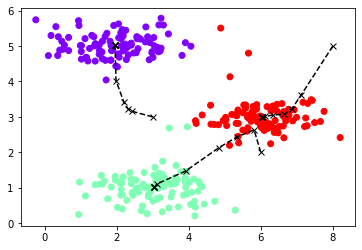

In [27]:
plot_data(X, centroid_all, idx_final)
plt.show()

In [28]:
### try different initial centroid

def init_centroid(X, k):
    index = np.random.choice(len(X), k) # random choose k points in X as initial centroid
    return X[index]

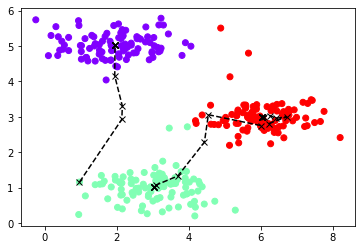

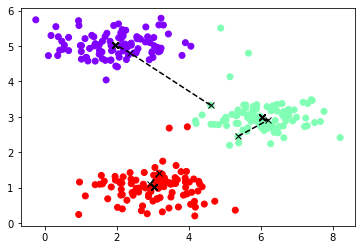

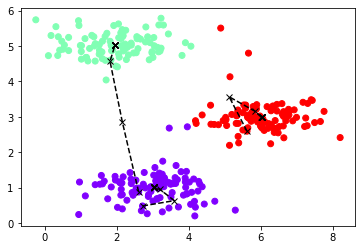

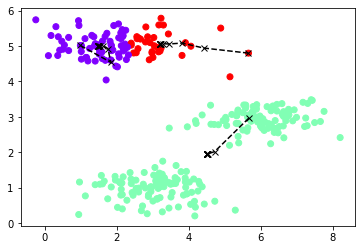

In [31]:
for i in range(4):
    idx, centroid_all = run_kmeans(X, init_centroid(X, k=3), iters=10)
    plot_data(X, centroid_all, idx)
    plt.show()

Data in the last figure above is not correctly clustered, which indicates that if the initial centroid is not correctly chosen, the results would be bad.